In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import getWorkingHRDfParquet, getHRIntervals, intervalOverlap, getHRsForTimePeriods
from datetime import date, time, timedelta
import pandas as pd
import numpy as np

/home/chowder/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [20]:
appleHRDf = getWorkingHRDfParquet('apple')
print(len(appleHRDf))
dataToFit = appleHRDf[(appleHRDf.index.date == date(2024,9,12)) &
                      (appleHRDf.index.time < time(0,20,0))].copy()
print(len(dataToFit))

567895
241


In [21]:
dataToFit['timeToNext'] = (dataToFit.index.to_series() - 
                            dataToFit.index.to_series().shift(1)
                            ).dt.total_seconds()
dataToFit.dropna(inplace=True)
dataToFit.head(2)

,value,timeToNext
sampleDT,,
2024-09-12 00:00:06-07:00,57.0,5.0
2024-09-12 00:00:09-07:00,57.0,3.0


In [22]:
dataToFit['dummyTime'] = np.arange(len(dataToFit))
dataToFit.head(2)

,value,timeToNext,dummyTime
sampleDT,,,
2024-09-12 00:00:06-07:00,57.0,5.0,0
2024-09-12 00:00:09-07:00,57.0,3.0,1


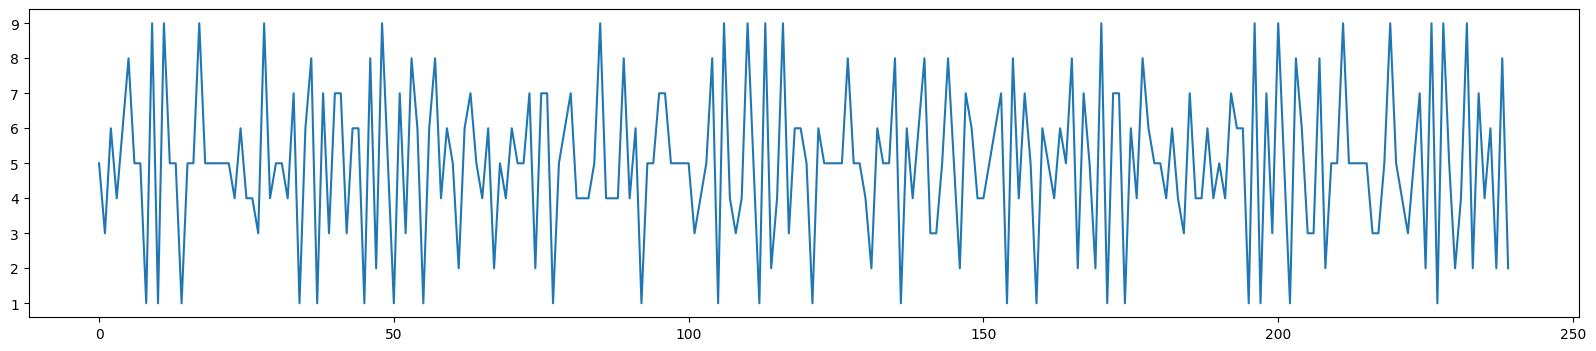

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,4))
plt.plot(dataToFit['dummyTime'], dataToFit['timeToNext'])

Text(0.5, 1.0, 'Time Plot of timeToNext Sales')

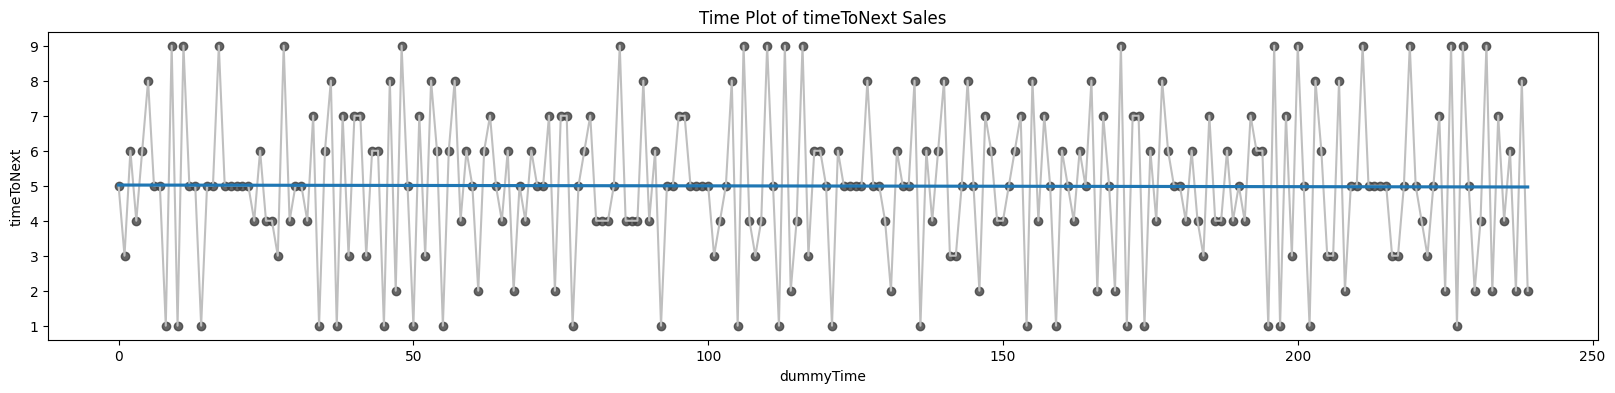

In [24]:

import seaborn as sns
fig, ax = plt.subplots(figsize=(20,4))
ax.plot('dummyTime', 'timeToNext', data=dataToFit, color='0.75')
ax = sns.regplot(x='dummyTime', y='timeToNext', data=dataToFit, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of timeToNext Sales')

In [25]:
dataToFit.index = dataToFit['dummyTime']

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# YOUR CODE HERE: Create training data
X = dataToFit.loc[:,['dummyTime']]  # features
y = dataToFit.loc[:,"timeToNext"]  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
r2_score(y, y_pred)

5.3533545933071025e-05

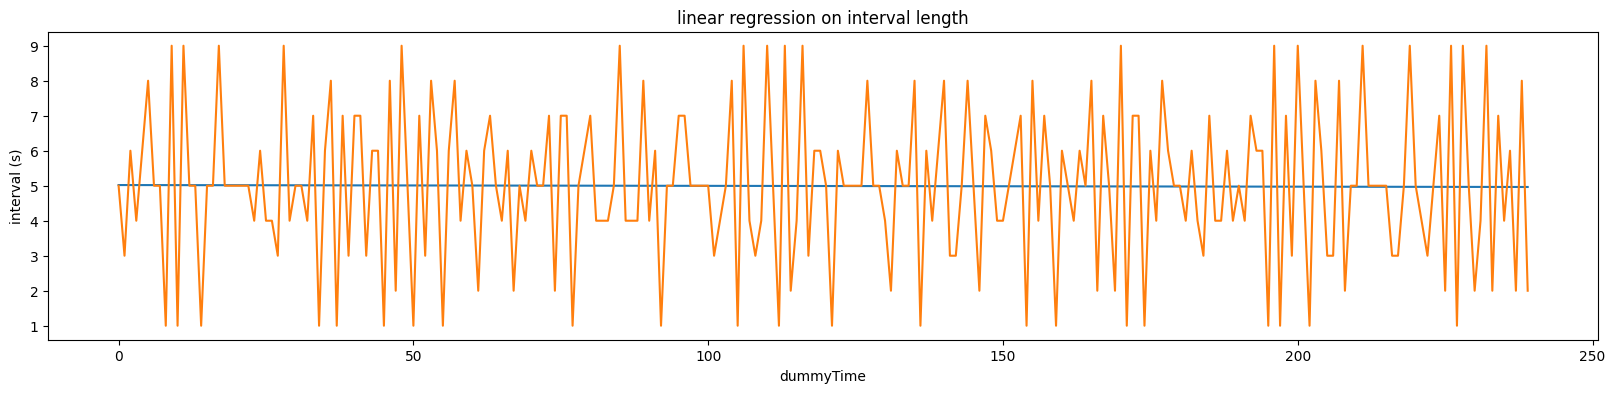

In [27]:
fig, ax = plt.subplots(figsize=(20,4))
ax = y_pred.plot()
plt.plot(dataToFit['dummyTime'], dataToFit['timeToNext'])
plt.title('linear regression on interval length')
plt.ylabel('interval (s)')
plt.show()

In [28]:
# YOUR CODE HERE: Create a lag feature from the target 'sales'
lag_1 = dataToFit["timeToNext"].shift(1)

dataToFit['lag_1'] = lag_1  # add to dataframe

X = dataToFit.loc[:, ['lag_1']].dropna()  # features
y = dataToFit.loc[:, 'timeToNext']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# YOUR CODE HERE: Create a LinearRegression instance and fit it to X and y.
model = LinearRegression()
model.fit(X,y)
# YOUR CODE HERE: Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)
r2_score(y, y_pred)

0.22155001428508259

Text(0.5, 1.0, 'Lag Plot of timeToNext ')

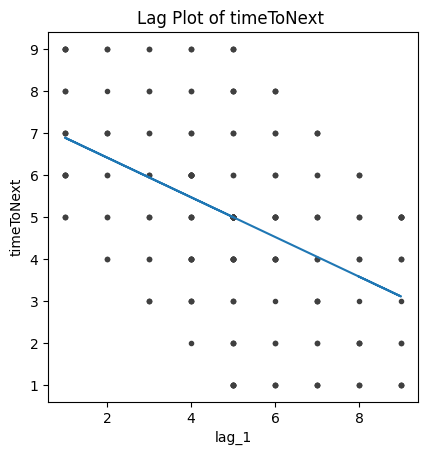

In [29]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('timeToNext')
ax.set_xlabel('lag_1')
ax.set_title('Lag Plot of timeToNext ')

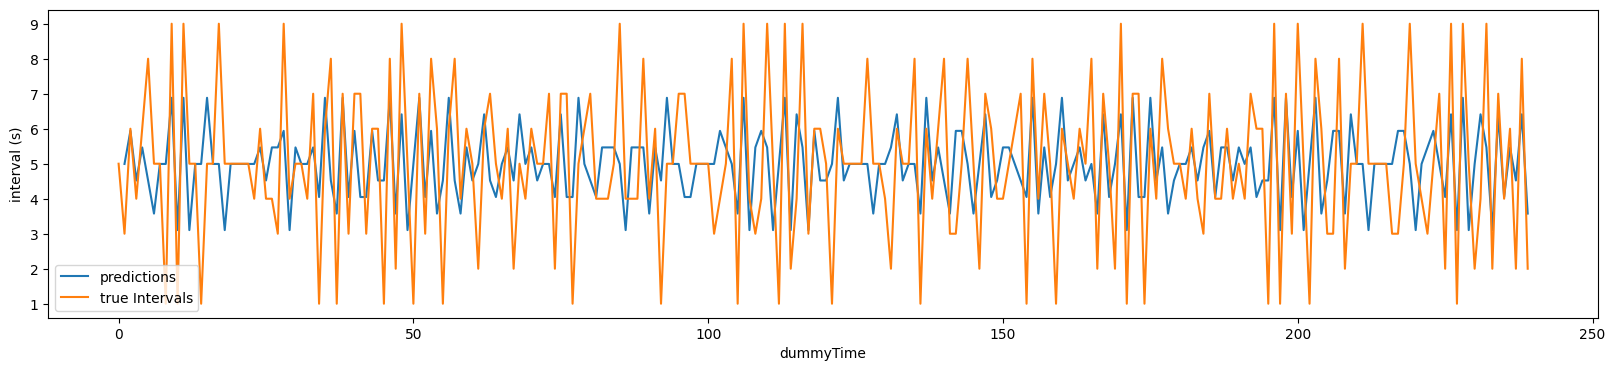

In [30]:
fig, ax = plt.subplots(figsize=(20,4))
ax = y_pred.plot(label='predictions')
plt.plot(dataToFit['dummyTime'], dataToFit['timeToNext'],label='true Intervals')
plt.ylabel('interval (s)')
plt.legend()
plt.show()

In [13]:
fitbitHRDf = getWorkingHRDfParquet('fitbit')
print(len(fitbitHRDf))

16052785


In [14]:
dataToFit = fitbitHRDf[(fitbitHRDf.index.date == date(2024,9,12)) &
                      (fitbitHRDf.index.time < time(0,30,0))].copy()
print(len(dataToFit))
dataToFit['timeToNext'] = (dataToFit.index.to_series() - 
                            dataToFit.index.to_series().shift(1)
                            ).dt.total_seconds()
dataToFit.dropna(inplace=True)

dataToFit['dummyTime'] = np.arange(len(dataToFit))
dataToFit.index = dataToFit['dummyTime']
dataToFit.head(2)

203


,value,timeToNext,dummyTime
dummyTime,,,
0,56,10.0,0
1,55,15.0,1


0.011394337867996263


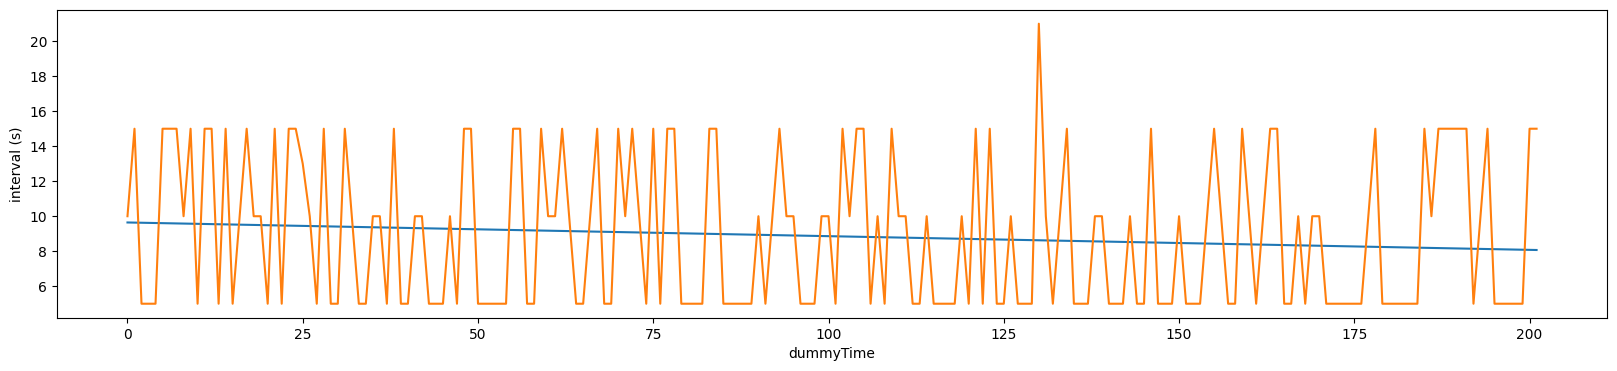

In [18]:
from sklearn.linear_model import LinearRegression


# YOUR CODE HERE: Create training data
X = dataToFit.loc[:,['dummyTime']]  # features
y = dataToFit.loc[:,"timeToNext"]  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

print(r2_score(y, y_pred))

fig, ax = plt.subplots(figsize=(20,4))
ax = y_pred.plot()
plt.plot(dataToFit['dummyTime'], dataToFit['timeToNext'])
plt.ylabel('interval (s)')
plt.show()

0.007305184538168863


Text(0.5, 1.0, 'Lag Plot of timeToNext ')

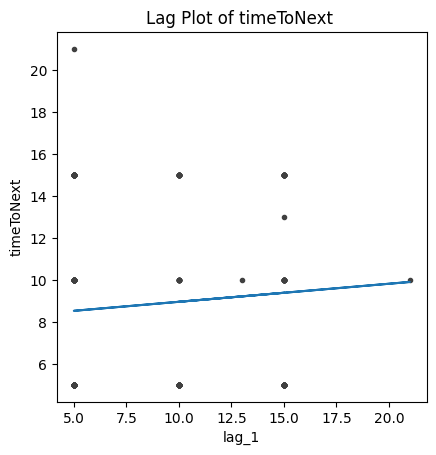

In [19]:
lag_1 = dataToFit["timeToNext"].shift(1)

dataToFit['lag_1'] = lag_1  # add to dataframe

X = dataToFit.loc[:, ['lag_1']].dropna()  # features
y = dataToFit.loc[:, 'timeToNext']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# YOUR CODE HERE: Create a LinearRegression instance and fit it to X and y.
model = LinearRegression()
model.fit(X,y)
# YOUR CODE HERE: Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

print(r2_score(y, y_pred))

fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('timeToNext')
ax.set_xlabel('lag_1')
ax.set_title('Lag Plot of timeToNext ')

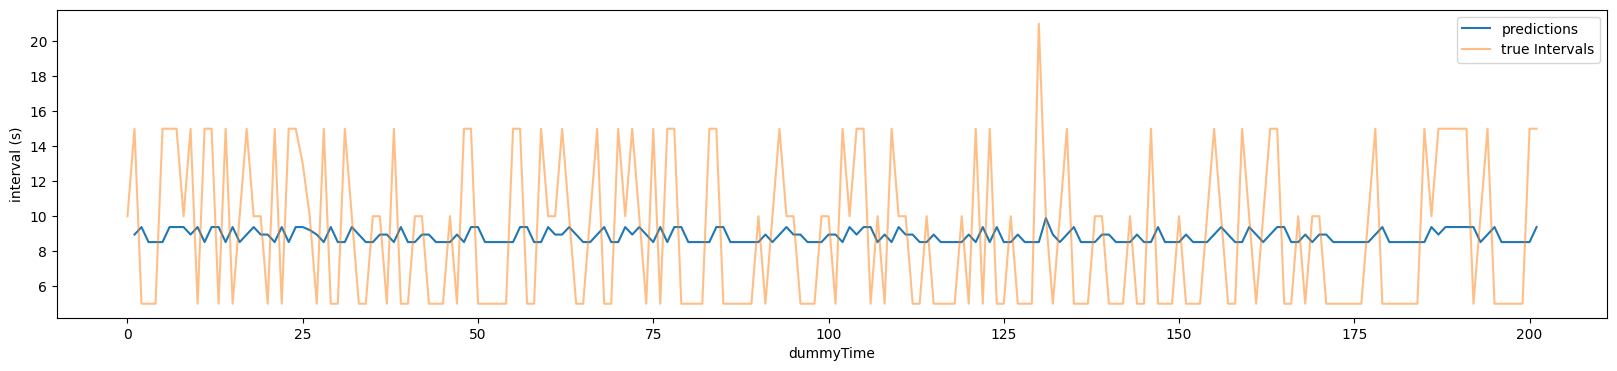

In [17]:
fig, ax = plt.subplots(figsize=(20,4))
ax = y_pred.plot(label='predictions')
plt.plot(dataToFit['dummyTime'], dataToFit['timeToNext'],label='true Intervals', alpha=0.5)
plt.ylabel('interval (s)')
plt.legend()
plt.show()